In [1]:
#http://www.aclweb.org/anthology/D14-1005
이논문을 참고해서 만들어볼 예정


SyntaxError: invalid syntax (<ipython-input-1-4db2b664f4aa>, line 2)

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.layers import Embedding,Permute,Reshape
import keras.backend as K
from keras.layers import Lambda,Input, Dense, Dropout, Activation, Flatten, MaxPooling2D, Conv2D, SeparableConv2D,BatchNormalization
from keras.models import Model
from keras.layers import Multiply

C:\Users\ie-02\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

In [ ]:
'''
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
'''

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:

x_train = x_train/255.
x_test = x_test/255.


In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
word_input_layer = Input(shape= (1,))
embedding_layer = Embedding(input_dim = 10, output_dim = 128, input_length = 1)(word_input_layer)
embedding_layer = Flatten()(embedding_layer)
embedding_layer = Reshape((128,))(embedding_layer)
word_model = Model(word_input_layer, embedding_layer)

image_input_layer = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
vgg_model = VGG16(input_tensor=image_input_layer,weights='imagenet', include_top=False)
vgg_model = Flatten()(vgg_model.output)
vgg_model = Dense(128,activation = 'relu')(vgg_model)
vgg_model = Model(image_input_layer,vgg_model)
vgg_model.trainable = False





In [45]:
concat = Multiply()([word_model.output,vgg_model.output]) 

In [46]:
model = Model([word_input_layer,image_input_layer],concat)

In [50]:
dense_1 = Dense(128, activation = 'relu')(model.output)
drop_1 = Dropout(0.4)(dense_1)
dense_2 = Dense(len(np.unique(y_train)),activation='softmax')(drop_1)

In [52]:
model = Model([word_input_layer,image_input_layer],dense_2)

In [54]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 32, 32, 64)   36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 16, 16, 64)   0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [64]:
for i in range(len(model.layers)):
    if 'block' in model.layers[i].name:
        model.layers[i].trainable = False


In [65]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 32, 32, 64)   36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 16, 16, 64)   0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [66]:
y_train_categoried = to_categorical(y_train)
y_test_categoried = to_categorical(y_test)

In [67]:
test_model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [163]:
test_model.fit([y_train,x_train],y_train_categoried)

Epoch 1/1
50000/50000 [==============================] - 603s 12ms/step - loss: 1.3097e-05 - acc: 1.0000


In [71]:
x_test[:100].shape

(100, 32, 32, 3)

In [73]:
result = test_model.predict([y_test[:100],x_test[:100]])

In [74]:
import matplotlib.pyplot as plt

In [75]:
result.shape

(100, 10)

In [76]:
from sklearn.manifold import TSNE

In [153]:
result_embedded = TSNE(n_components = 3).fit_transform(result)

C:\Users\ie-02\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [117]:
import matplotlib.cm as cm

In [154]:
colors = plt.cm.rainbow(np.linspace(0,1,10))

In [157]:
result_embedded[0]

array([ 3.6028050e-02,  1.1051599e+01, -8.0347412e+01], dtype=float32)

In [159]:
from mpl_toolkits.mplot3d import Axes3D

In [162]:
%matplotlib tk
ax = Axes3D(plt.figure())
for i in range(100):
    label = y_test[i][0]
    ax.scatter(result_embedded[i,0],result_embedded[i,1],result_embedded[i,2], c= colors[label],alpha = 0.5)

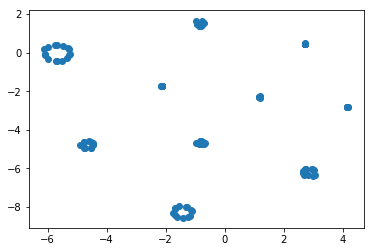

In [85]:
plt.scatter(result_embedded[:,0],result_embedded[:,1])